# Sentiment Analysis

In [1]:
from nltk import download
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/adriana/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/adriana/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/adriana/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/adriana/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/adriana/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nlt

True

In [2]:
%run ../src/plots.py

In [3]:
%run ../src/utils.py

/home/adriana/anaconda3/envs/bigdata/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
set_seed()

Now we will focus on analysing and filtering important data on the tags and title columns. With this method, we will be able to identify key words to generate relationships

In [5]:
data = initialize_data()

In [ ]:
data = calculate_sentiment(data)

In [11]:
data.head()

,title,channel_name,country,view_count,like_count,comment_count,video_tags,kind,publish_date,engagement_score,tokens,filtered_tokens,clean_text,sentiment_score,sentiment
0,Winky D - Propaganda (Official Video),winkyonline,ZW,529245,43159,7712,nan,youtube#video,2025-04-04 00:00:00+00:00,0.206811,[nan],[nan],nan,0.0000,neutral
1,Donator Calvins - Door Ratovharwa (Mjolo Offic...,Zimcelebs Tv,ZW,147848,5129,476,nan,youtube#video,2025-04-08 00:00:00+00:00,0.079040,[nan],[nan],nan,0.0000,neutral
2,SaintFloew - Fofa Fofa ft. Nutty O (Official M...,SaintFloew,ZW,391827,11825,1052,"saintfloew, santa, zimbabwe, official, officia...",youtube#video,2025-04-03 00:00:00+00:00,0.068413,"[saintfloew, ,, santa, ,, zimbabwe, ,, officia...","[saintfloew, ,, santa, ,, zimbabwe, ,, officia...","saintfloew , santa , zimbabwe , official , off...",-0.5994,negative
3,Zimbabwe protest I Protests against term exten...,SABC News,ZW,230064,0,259,"sabc news, actuality, world news, local news",youtube#video,2025-03-31 00:00:00+00:00,0.003377,"[sabc, news, ,, actuality, ,, world, news, ,, ...","[sabc, news, ,, actuality, ,, world, news, ,, ...","sabc news , actuality , world news , local news",0.0000,neutral
4,Two Impending decisions in Zimbabwe - prophecy,Divine Kingdom TV - Diakoneo,ZW,60506,1106,108,"prophecies, prophecy, prayer, sermon, ian ndlo...",youtube#video,2025-04-10 00:00:00+00:00,0.041913,"[prophecies, ,, prophecy, ,, prayer, ,, sermon...","[prophecies, ,, prophecy, ,, prayer, ,, sermon...","prophecies , prophecy , prayer , sermon , ian ...",0.5106,positive


In [10]:
sentiment_engagement = data.groupby("sentiment")["engagement_score"].mean().reset_index()


print("Average engagement by sentiment :")
display(sentiment_engagement)


Average engagement by sentiment :


,sentiment,engagement_score
0,negative,0.629660
1,neutral,52.403839
2,positive,212.132843


📌 So, what is VADER based on?

VADER compares the words in the text (clean_text) with its own lexicon-based dictionary, which assigns a sentiment score to each word.

For example:

Words like love, amazing, win, happy → increase the score.

Words like hate, disaster, fail, angry → decrease the score.

If the text contains only neutral or unrecognized words → the result is 0.0 (neutral).

/home/adriana/myproject/YOUTUBE_NUEVO/youtube/src/plots.py:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="sentiment", y="engagement_score", palette="viridis")


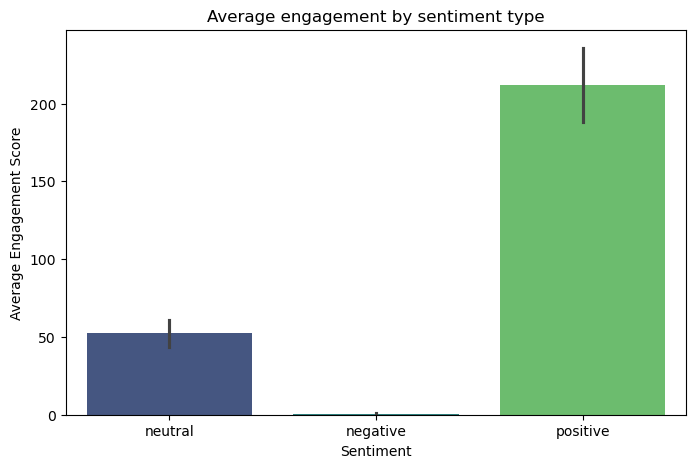

In [7]:
plot_average_sentiment(data)

Videos with "neutral" tags have the highest average engagement.

"Positive" tags have slightly less engagement than neutral ones.

"Negative" tags have very low engagement , probably because there are few examples with negative sentiment or those videos don't generate many reactions.

In [9]:
recommendations, sampled_features, neighbor_indices = recommend_videos_sentiment(data, user_sentiment="positive", num_recommendations=5, sample_size=500)
print("Recommended videos:", recommendations)

Recommended videos: ['تحدي أقنعك تاخذ الهدية أو راح تكون لي ( تحدي الإقناع ) !!', 'تحدي ملف الألغاز ( اكتشف لون المنتج ) !!', 'NRL Match Highlights 2025 | Panthers v Sharks | Round 1, 2025', 'FAVELA - Valentino GRM x Smile Beats x @Crissy.M3  (Video Oficial)', 'Все плюсы мультфильма "Человек-Паук: Паутина вселенных"']


✅ They have the same sentiment as the user requested

✅ They have similar content (based on the text vectors in clean_text)